In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df_ori=pd.read_csv('dataset/flight_dataset.csv')
df_ori.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [64]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [65]:
df_ori.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


# Normalized Data

In [66]:
df_ori['ExactDate'] = pd.to_datetime(df_ori[['Year', 'Month', 'Date']].rename(columns={'Date': 'day'}))
df_ori['Total_Duration'] = (df_ori['Duration_hours'] + df_ori['Duration_min'] / 60).round(2)

def categorize_time(hour):
    if 0 <= hour < 3:
        return 'Midnight'
    elif 3 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 5:
        return 'Afternoon'
    elif 5 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df_ori['Dep_time'] = df_ori['Dep_hours'].apply(categorize_time)
df_ori['Arrival_time'] = df_ori['Arrival_hours'].apply(categorize_time)
df_ori.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,ExactDate,Total_Duration,Dep_time,Arrival_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,2019-03-24,2.83,Night,Midnight
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,2019-05-01,7.42,Early Morning,Evening
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,2019-06-09,19.00,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,2019-05-12,5.42,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,2019-03-01,4.75,Evening,Night


In [67]:
df = df_ori.drop(columns=['Date','Month','Year','Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min'])
df.head()

,Airline,Source,Destination,Total_Stops,Price,ExactDate,Total_Duration,Dep_time,Arrival_time
0,IndiGo,Banglore,New Delhi,0,3897,2019-03-24,2.83,Night,Midnight
1,Air India,Kolkata,Banglore,2,7662,2019-05-01,7.42,Early Morning,Evening
2,Jet Airways,Delhi,Cochin,2,13882,2019-06-09,19.00,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,1,6218,2019-05-12,5.42,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,2019-03-01,4.75,Evening,Night


In [68]:
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')
df['Total_Stops'] = df['Total_Stops'].astype(str)
df = df.sort_values(by=['Total_Stops'], ascending=[True])
df = df.reset_index(drop=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,ExactDate,Total_Duration,Dep_time,Arrival_time
0,IndiGo,Banglore,Delhi,0,3897,2019-03-24,2.83,Night,Midnight
1,IndiGo,Banglore,Delhi,0,4284,2019-05-06,2.75,Midnight,Early Morning
2,SpiceJet,Chennai,Kolkata,0,3543,2019-05-03,2.33,Evening,Evening
3,Air India,Chennai,Kolkata,0,4667,2019-06-01,2.25,Morning,Evening
4,IndiGo,Kolkata,Banglore,0,4804,2019-06-12,2.58,Early Morning,Morning


In [154]:
df_Dep_time

,Airline,Source,Destination,Total_Stops,Price,ExactDate,Total_Duration,Dep_time,Arrival_time
0,Air India,Banglore,Delhi,4,17686,2019-03-01,29.50,Early Morning,Morning
1,Jet Airways,Delhi,Cochin,2,13014,2019-06-01,22.92,Early Morning,Early Morning
2,Jet Airways,Delhi,Cochin,2,9254,2019-03-27,13.42,Early Morning,Evening
3,SpiceJet,Banglore,Delhi,0,3625,2019-06-01,2.67,Early Morning,Morning
4,Jet Airways,Delhi,Cochin,2,13376,2019-06-01,21.67,Early Morning,Early Morning
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,2019-04-01,2.50,Night,Midnight
10679,IndiGo,Banglore,Delhi,0,3419,2019-05-24,2.83,Night,Midnight
10680,Jet Airways,Delhi,Cochin,1,10262,2019-06-24,14.75,Night,Evening
10681,Air India,Banglore,Delhi,1,8425,2019-03-09,15.33,Night,Evening


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airline         10683 non-null  object        
 1   Source          10683 non-null  object        
 2   Destination     10683 non-null  object        
 3   Total_Stops     10683 non-null  object        
 4   Price           10683 non-null  int64         
 5   ExactDate       10683 non-null  datetime64[ns]
 6   Total_Duration  10683 non-null  float64       
 7   Dep_time        10683 non-null  object        
 8   Arrival_time    10683 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 751.3+ KB


/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/4227793653.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, ha='right')
/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/4227793653.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_3.set_xticklabels(ax_3.get_xticklabels(), rotation=90)


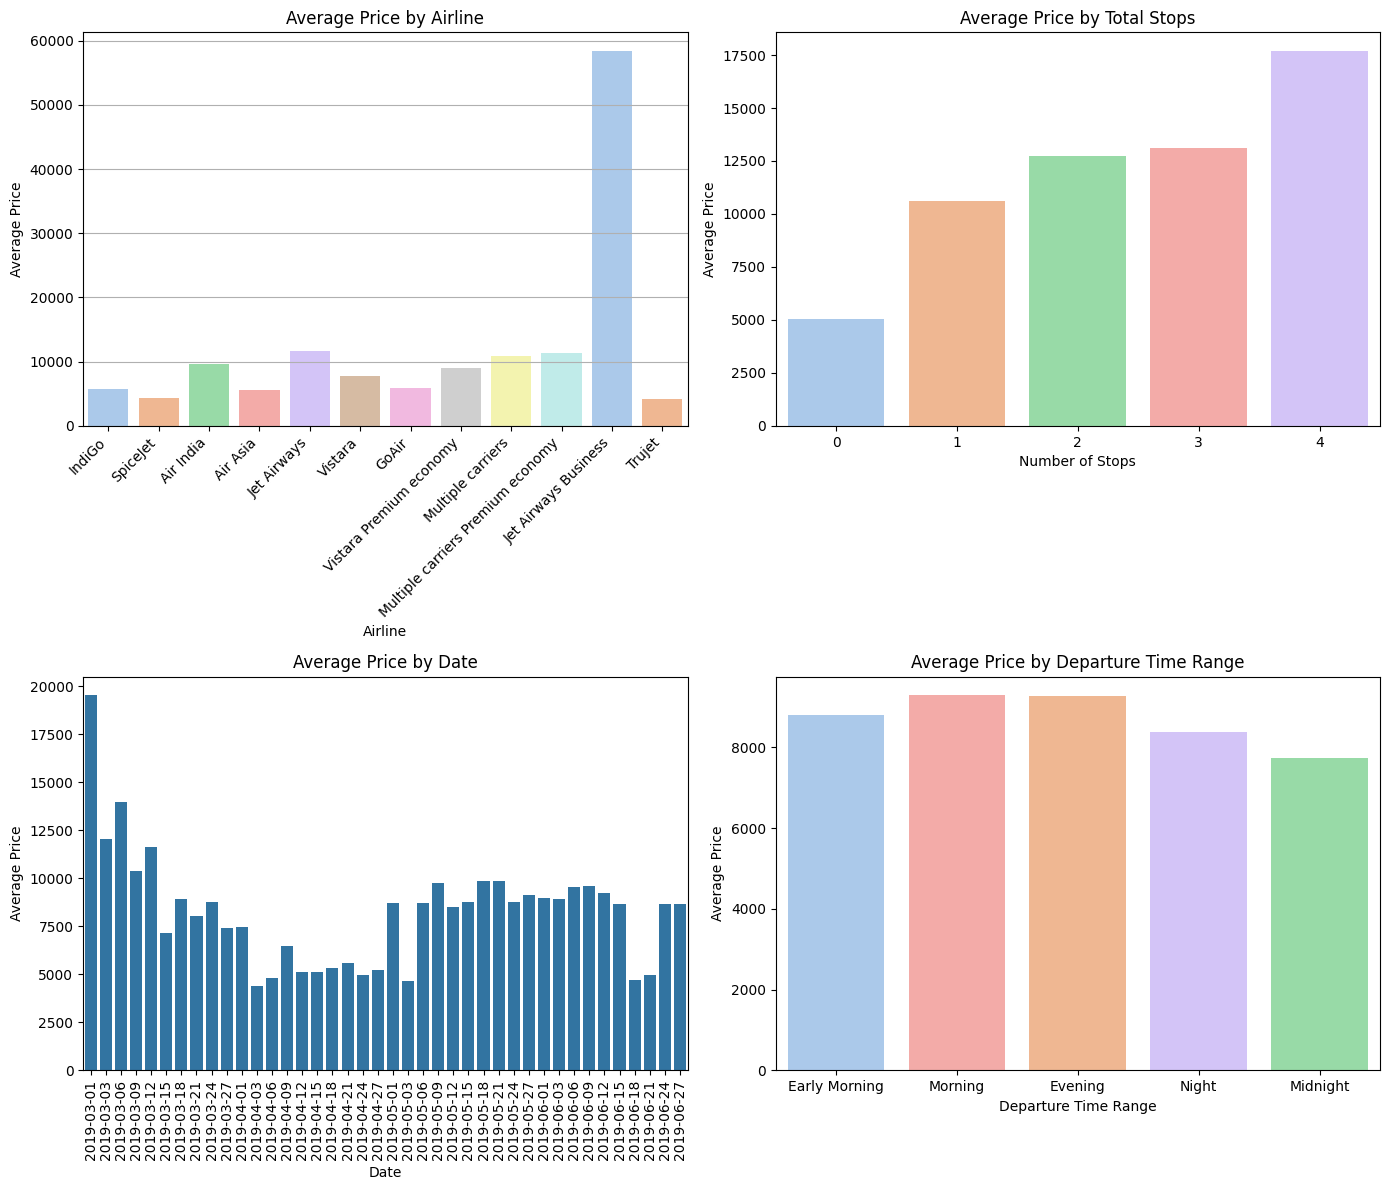

In [131]:
fig,((ax_1, ax_2),(ax_3,ax_4)) = plt.subplots(2, 2, figsize=(14, 12))

# First subplot: Average Price by Airline
sns.barplot(x='Airline', y='Price', data=df, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None, ax=ax_1)
ax_1.set_title('Average Price by Airline')
ax_1.set_xlabel('Airline')
ax_1.set_ylabel('Average Price')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, ha='right')
ax_1.grid(axis='y')

# Second subplot: Average Price by Total Stops
sns.barplot(x='Total_Stops', y='Price', hue='Total_Stops', data=df, estimator=np.mean, palette='pastel', errorbar=None, ax=ax_2)
ax_2.set_title('Average Price by Total Stops')
ax_2.set_xlabel('Number of Stops')
ax_2.set_ylabel('Average Price')

# Third subplot: Average Price by Date
sns.barplot(x='ExactDate', y='Price', data=df_date, estimator=np.mean, errorbar=None, ax=ax_3)
ax_3.set_title('Average Price by Date')
ax_3.set_xlabel('Date')
ax_3.set_ylabel('Average Price')
ax_3.set_xticklabels(ax_3.get_xticklabels(), rotation=90)

Departure_time_order = ['Early Morning','Morning','Evening','Night','Midnight']
sns.barplot(data=df_Dep_time, x="Dep_time", y="Price", hue = "Dep_time", palette='pastel', errorbar=None, order= Departure_time_order,ax=ax_4)
ax_4.set_title('Average Price by Departure Time Range')
ax_4.set_xlabel('Departure Time Range')
ax_4.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Price')

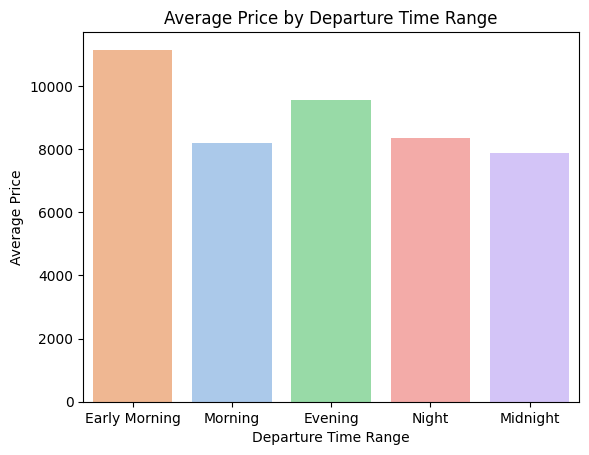

In [155]:
Arrival_time_order = ['Early Morning','Morning','Evening','Night','Midnight']
sns.barplot(data=df_Dep_time, x="Arrival_time", y="Price", hue = "Arrival_time", palette='pastel', errorbar=None, order= Arrival_time_order)
plt.title('Average Price by Departure Time Range')
plt.xlabel('Departure Time Range')
plt.ylabel('Average Price')

In [78]:
# Define the function to filter, sort, and reset the index of the DataFrame
def filter_sort_dataframe(df, source, destination):
    filtered_df = df.loc[(df['Source'] == source) & (df['Destination'] == destination)].copy()
    sorted_df = filtered_df.sort_values(by=['ExactDate', 'Airline', 'Price'], ascending=[True, True, True])
    reset_df = sorted_df.reset_index(drop=True)
    return reset_df

# List of source and destination pairs
source_destination_pairs = [('Banglore', 'Delhi'),('Chennai', 'Kolkata'),('Delhi', 'Cochin'),('Kolkata','Banglore'),('Mumbai','Hyderabad')]

# Dictionary to store the resulting DataFrames
filtered_dfs = {}

# Loop through each pair and create the DataFrame
for source, destination in source_destination_pairs:
    key = f"{source}_{destination}"
    filtered_dfs[key] = filter_sort_dataframe(df, source, destination)

# Example usage
df_Banglore_Delhi = filtered_dfs['Banglore_Delhi']
df_Chennai_Kolkata = filtered_dfs['Chennai_Kolkata']
df_Delhi_Cochin= filtered_dfs['Delhi_Cochin']
df_Kolkata_Banglore = filtered_dfs['Kolkata_Banglore']
df_Mumbai_Hyderabad = filtered_dfs['Mumbai_Hyderabad']

## Flights from Banglore to Delhi

/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/1981427941.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/1981427941.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


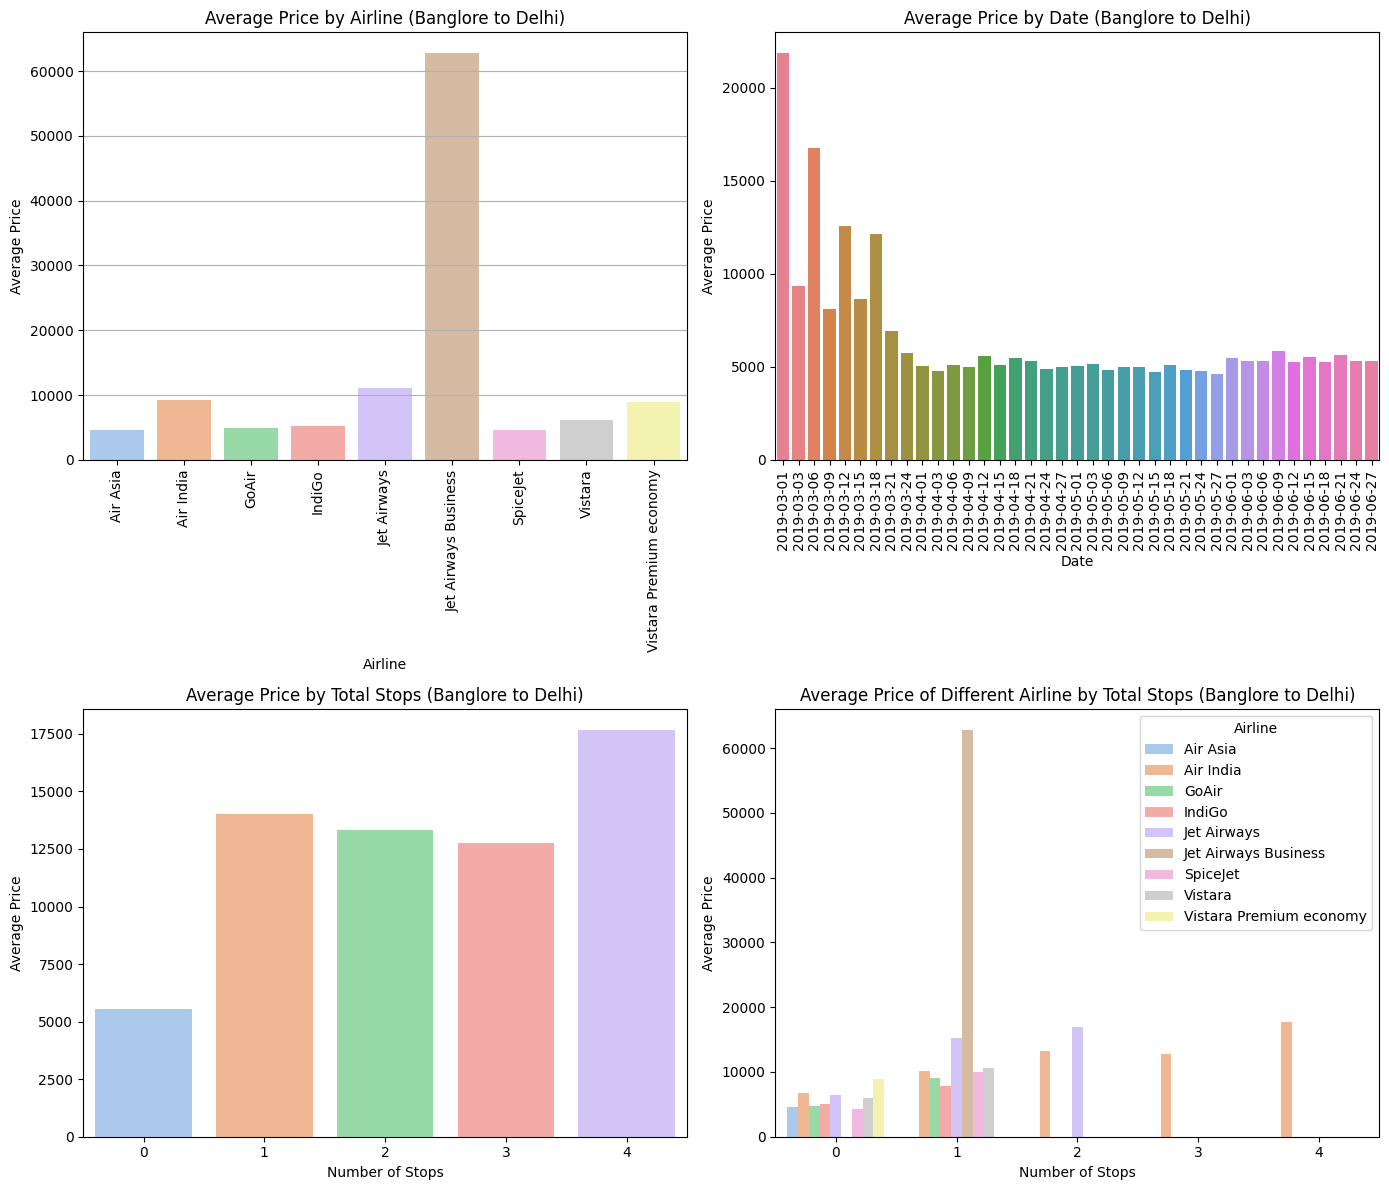

In [73]:
# First subplot: Average Price by Airline
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x ='Airline', y='Price', data=df_Banglore_Delhi, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None, ax=ax1)
ax1.set_title('Average Price by Airline (Banglore to Delhi)')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Average Price')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.grid(axis='y')

# Second subplot: Average Price by Date
sns.barplot(x ='ExactDate', y='Price', data=df_Banglore_Delhi, hue='ExactDate', estimator=np.mean, errorbar=None, ax=ax2)
ax2.set_title('Average Price by Date (Banglore to Delhi)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Price')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Third subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Total_Stops', data=df_Banglore_Delhi, estimator=np.mean, palette='pastel', errorbar=None, ax=ax3)
ax3.set_title('Average Price by Total Stops (Banglore to Delhi)')
ax3.set_xlabel('Number of Stops')
ax3.set_ylabel('Average Price')

# Forth subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Airline', data=df_Banglore_Delhi, estimator=np.mean, palette='pastel', errorbar=None, ax=ax4)
ax4.set_title('Average Price of Different Airline by Total Stops (Banglore to Delhi)')
ax4.set_xlabel('Number of Stops')
ax4.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/3758665929.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90)


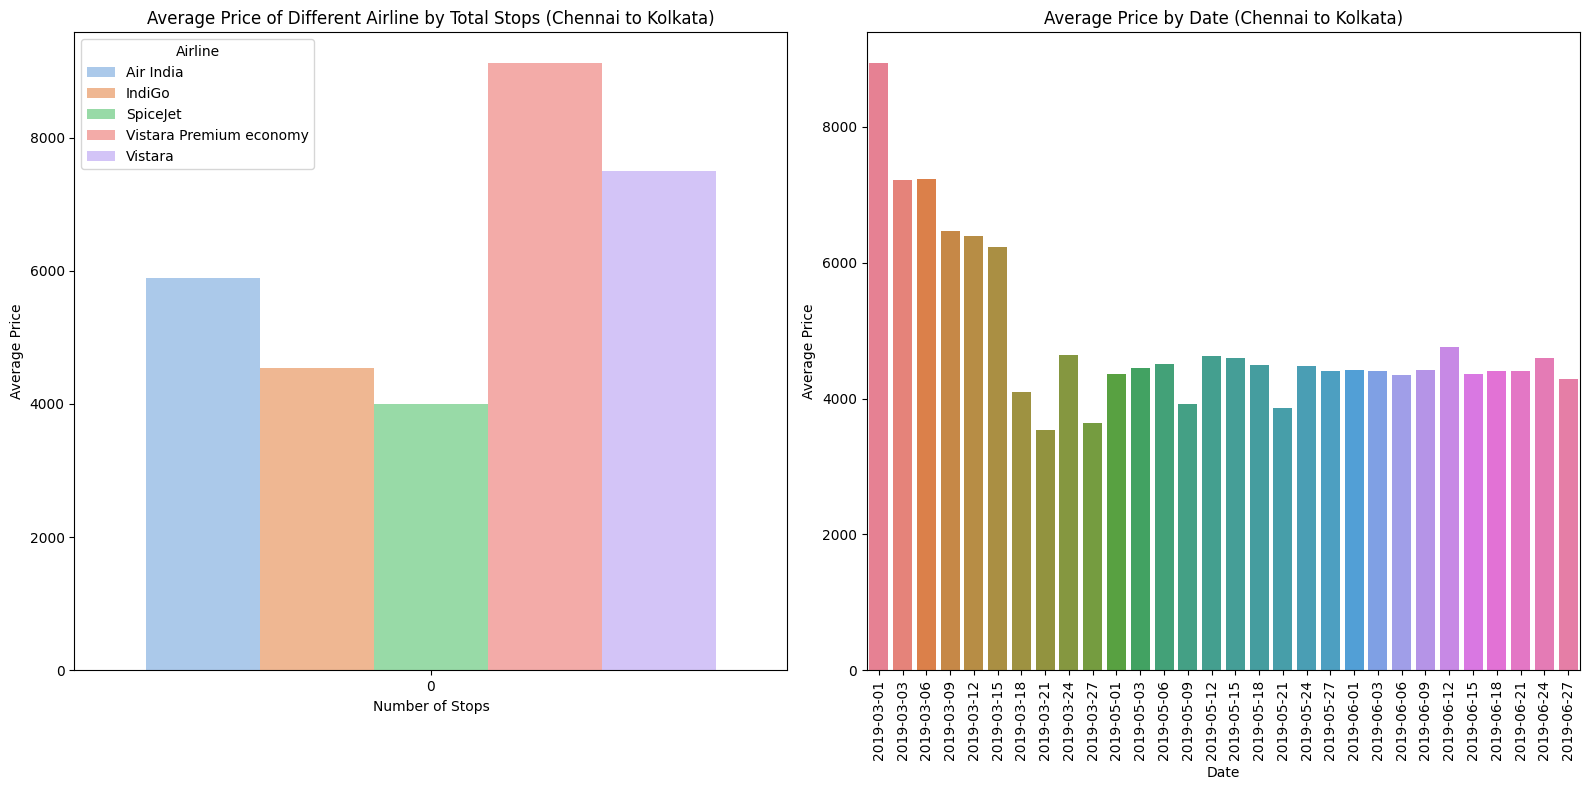

In [150]:
# First subplot: Average Price by Airline
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 8))

# First subplot: Average Price by Date
sns.barplot(x ='Total_Stops', y='Price', hue='Airline', data=df_Chennai_Kolkata, estimator=np.mean, palette='pastel', errorbar=None, ax=ax5)
ax5.set_title('Average Price of Different Airline by Total Stops (Chennai to Kolkata)')
ax5.set_xlabel('Number of Stops')
ax5.set_ylabel('Average Price')

# Second subplot: Average Price by Total Stops
sns.barplot(x ='ExactDate', y='Price', data=df_Chennai_Kolkata, hue='ExactDate', estimator=np.mean, errorbar=None, ax=ax6)
ax6.set_title('Average Price by Date (Chennai to Kolkata)')
ax6.set_xlabel('Date')
ax6.set_ylabel('Average Price')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/3242128231.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/3242128231.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90)


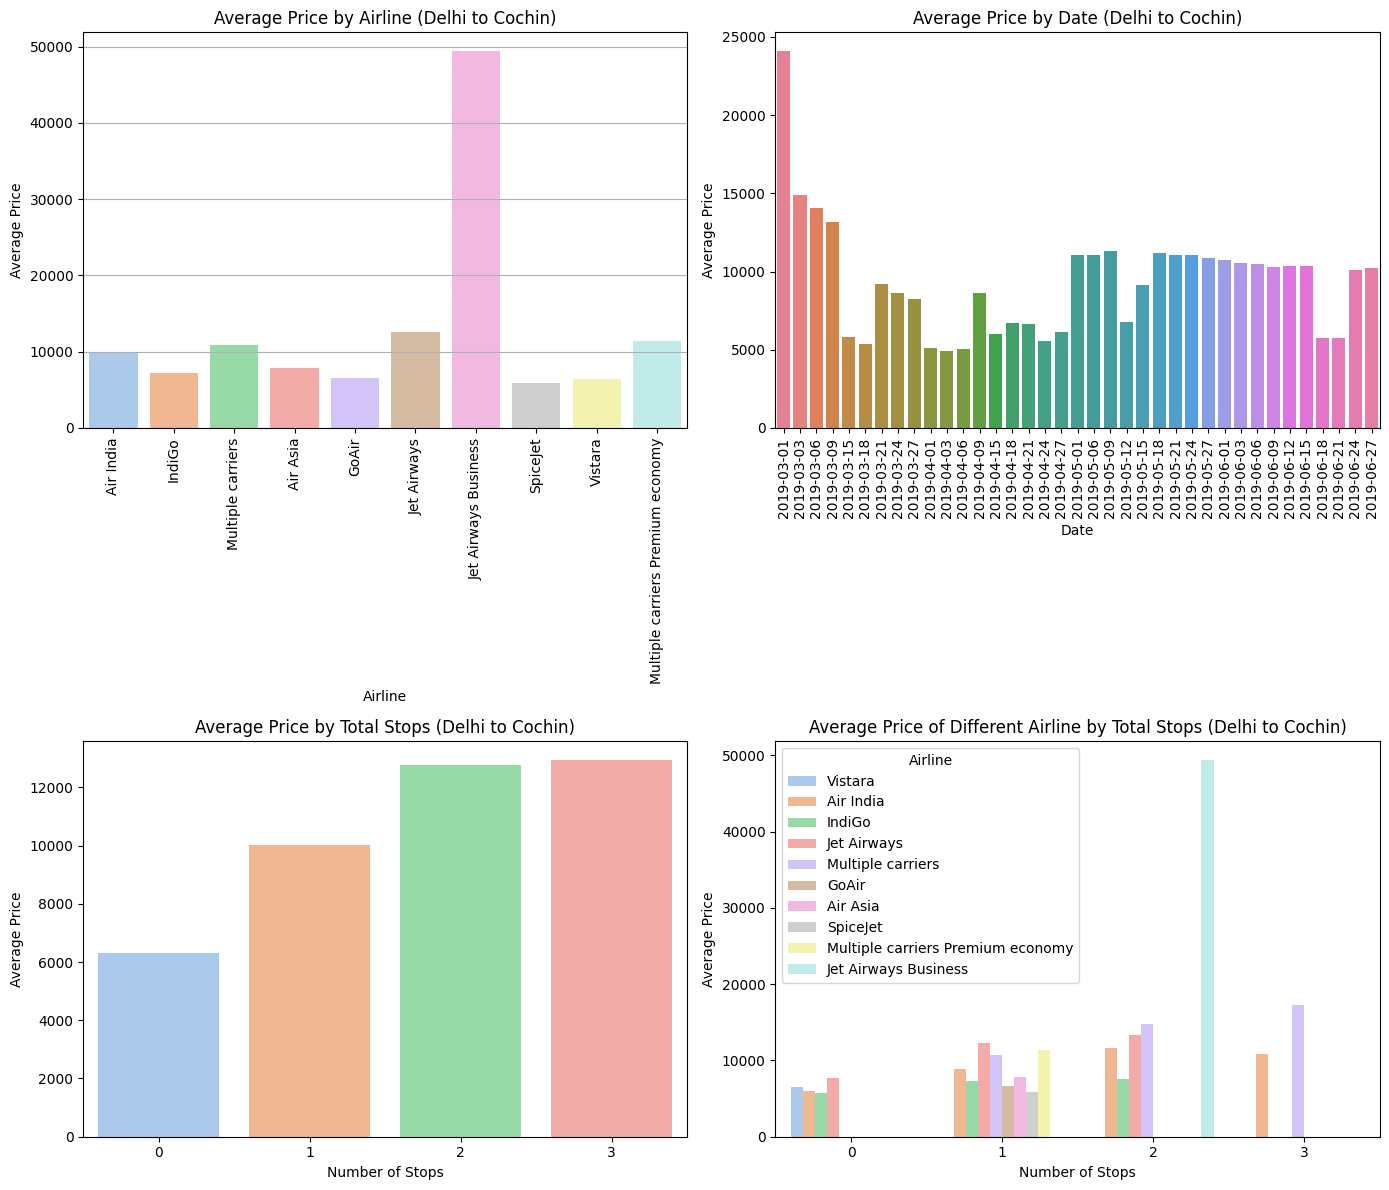

In [75]:
df_Delhi_Cochin_stops = df_Delhi_Cochin.sort_values(by=['Total_Stops'], ascending=[True])

# First subplot: Average Price by Airline
fig, ((ax7, ax8), (ax9, ax10)) = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x ='Airline', y='Price', data=df_Delhi_Cochin, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None, ax=ax7)
ax7.set_title('Average Price by Airline (Delhi to Cochin)')
ax7.set_xlabel('Airline')
ax7.set_ylabel('Average Price')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
ax7.grid(axis='y')

# Second subplot: Average Price by Date
sns.barplot(x ='ExactDate', y='Price', data=df_Delhi_Cochin, hue='ExactDate', estimator=np.mean, errorbar=None, ax=ax8)
ax8.set_title('Average Price by Date (Delhi to Cochin)')
ax8.set_xlabel('Date')
ax8.set_ylabel('Average Price')
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90)

# Third subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Total_Stops', data=df_Delhi_Cochin_stops, estimator=np.mean, palette='pastel', errorbar=None, ax=ax9)
ax9.set_title('Average Price by Total Stops (Delhi to Cochin)')
ax9.set_xlabel('Number of Stops')
ax9.set_ylabel('Average Price')

# Forth subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Airline', data=df_Delhi_Cochin_stops, estimator=np.mean, palette='pastel', errorbar=None, ax=ax10)
ax10.set_title('Average Price of Different Airline by Total Stops (Delhi to Cochin)')
ax10.set_xlabel('Number of Stops')
ax10.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/275756055.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax11.set_xticklabels(ax11.get_xticklabels(), rotation=90)
/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/275756055.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax12.set_xticklabels(ax12.get_xticklabels(), rotation=90)


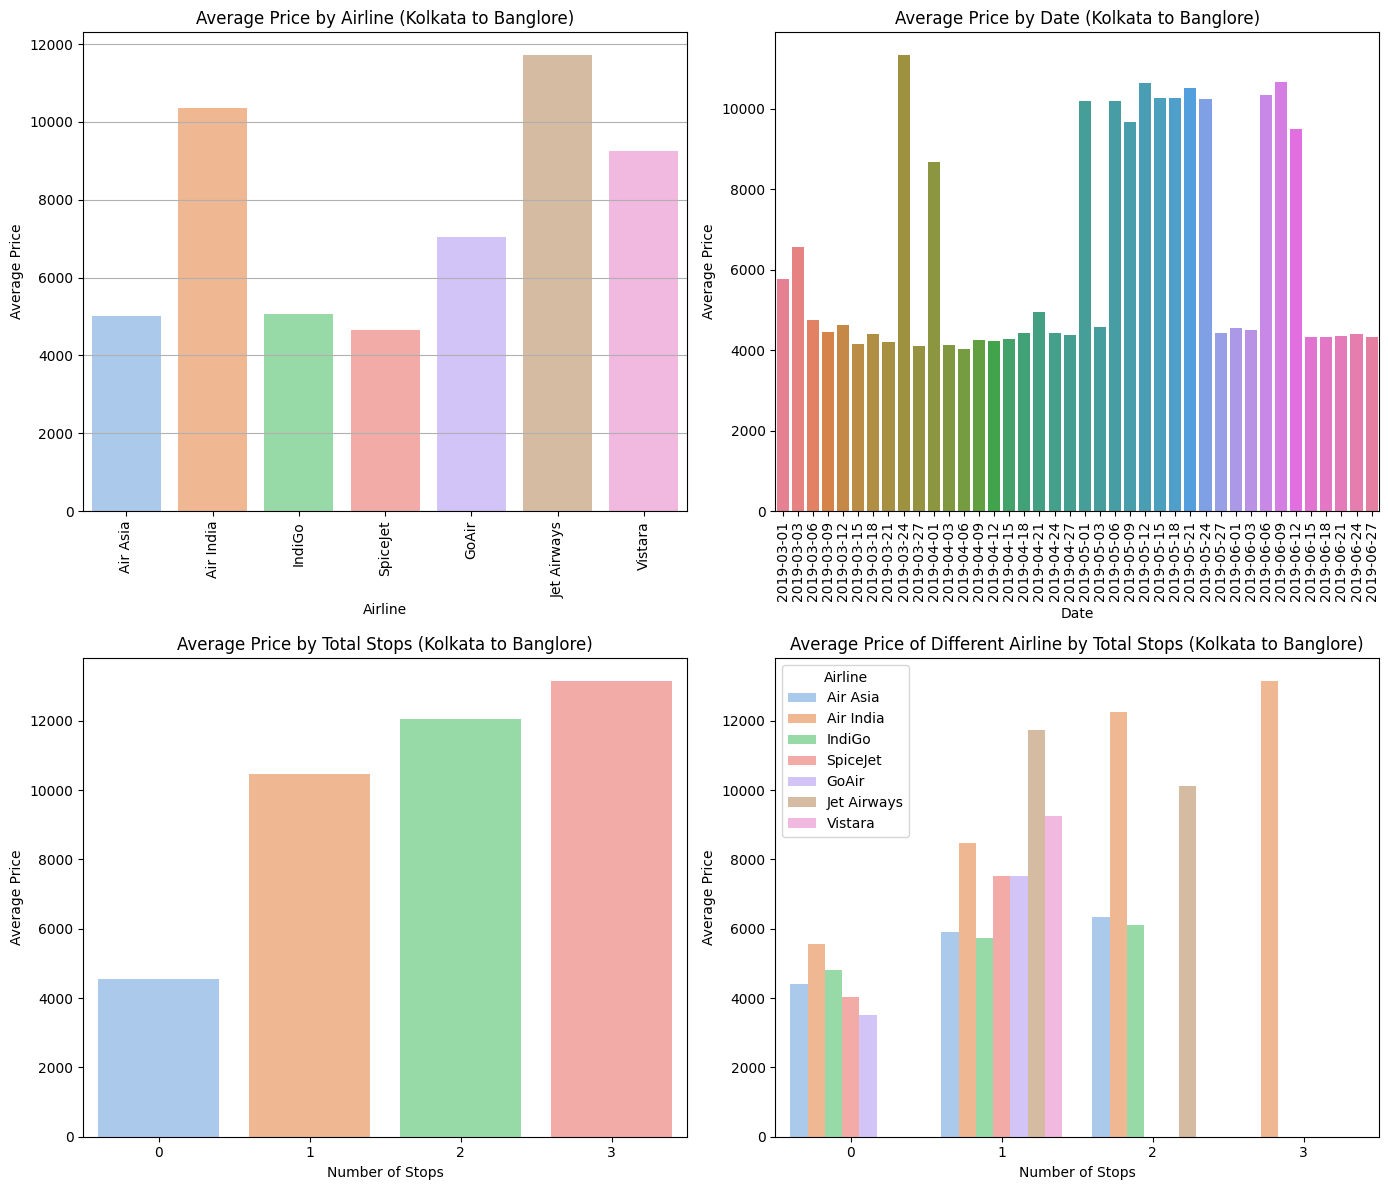

In [79]:
# First subplot: Average Price by Airline
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x ='Airline', y='Price', data=df_Kolkata_Banglore, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None, ax=ax11)
ax11.set_title('Average Price by Airline (Kolkata to Banglore)')
ax11.set_xlabel('Airline')
ax11.set_ylabel('Average Price')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=90)
ax11.grid(axis='y')

# Second subplot: Average Price by Date
sns.barplot(x ='ExactDate', y='Price', data=df_Kolkata_Banglore, hue='ExactDate', estimator=np.mean, errorbar=None, ax=ax12)
ax12.set_title('Average Price by Date (Kolkata to Banglore)')
ax12.set_xlabel('Date')
ax12.set_ylabel('Average Price')
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=90)

# Third subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Total_Stops', data=df_Kolkata_Banglore, estimator=np.mean, palette='pastel', errorbar=None, ax=ax13)
ax13.set_title('Average Price by Total Stops (Kolkata to Banglore)')
ax13.set_xlabel('Number of Stops')
ax13.set_ylabel('Average Price')

# Forth subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Airline', data=df_Kolkata_Banglore, estimator=np.mean, palette='pastel', errorbar=None, ax=ax14)
ax14.set_title('Average Price of Different Airline by Total Stops (Kolkata to Banglore)')
ax14.set_xlabel('Number of Stops')
ax14.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/728920887.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax15.set_xticklabels(ax15.get_xticklabels(), rotation=90)
/var/folders/6_/9cjknwbj6n5dbp5d36yy_jzr0000gn/T/ipykernel_13017/728920887.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax16.set_xticklabels(ax12.get_xticklabels(), rotation=90)


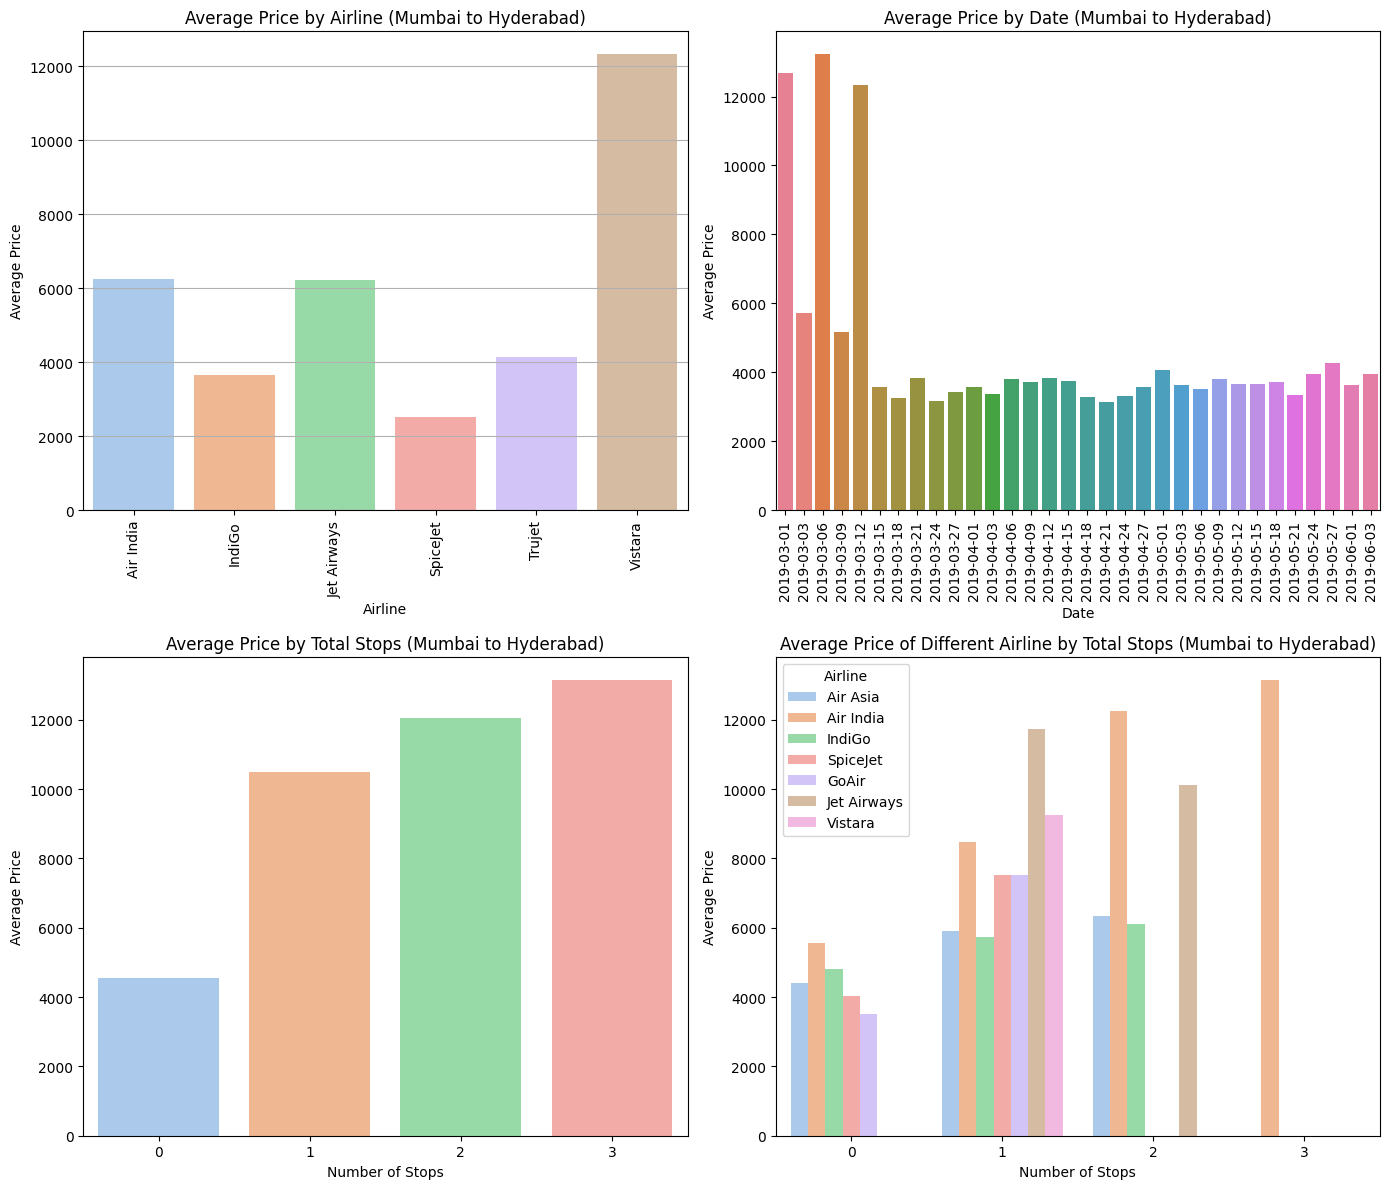

In [80]:
# First subplot: Average Price by Airline
fig, ((ax15, ax16), (ax17, ax18)) = plt.subplots(2, 2, figsize=(14, 12))

sns.barplot(x ='Airline', y='Price', data=df_Mumbai_Hyderabad, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None, ax=ax15)
ax15.set_title('Average Price by Airline (Mumbai to Hyderabad)')
ax15.set_xlabel('Airline')
ax15.set_ylabel('Average Price')
ax15.set_xticklabels(ax15.get_xticklabels(), rotation=90)
ax15.grid(axis='y')

# Second subplot: Average Price by Date
sns.barplot(x ='ExactDate', y='Price', data=df_Mumbai_Hyderabad, hue='ExactDate', estimator=np.mean, errorbar=None, ax=ax16)
ax16.set_title('Average Price by Date (Mumbai to Hyderabad)')
ax16.set_xlabel('Date')
ax16.set_ylabel('Average Price')
ax16.set_xticklabels(ax12.get_xticklabels(), rotation=90)

# Third subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Total_Stops', data=df_Kolkata_Banglore, estimator=np.mean, palette='pastel', errorbar=None, ax=ax17)
ax17.set_title('Average Price by Total Stops (Mumbai to Hyderabad)')
ax17.set_xlabel('Number of Stops')
ax17.set_ylabel('Average Price')

# Forth subplot: Average Price by Total Stops
sns.barplot(x ='Total_Stops', y='Price', hue='Airline', data=df_Kolkata_Banglore, estimator=np.mean, palette='pastel', errorbar=None, ax=ax18)
ax18.set_title('Average Price of Different Airline by Total Stops (Mumbai to Hyderabad)')
ax18.set_xlabel('Number of Stops')
ax18.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

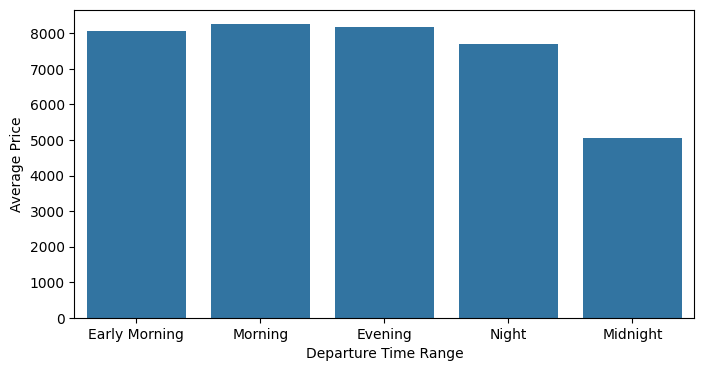

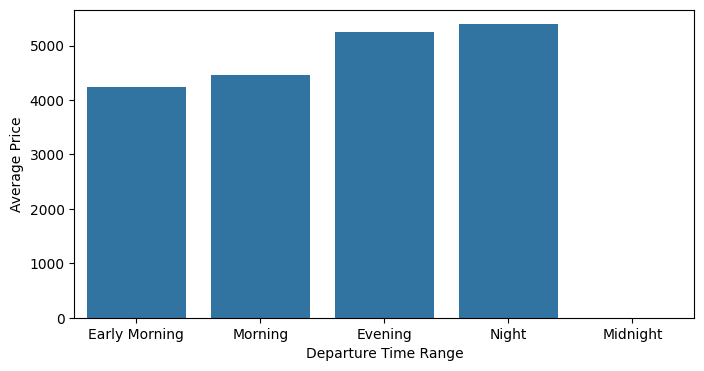

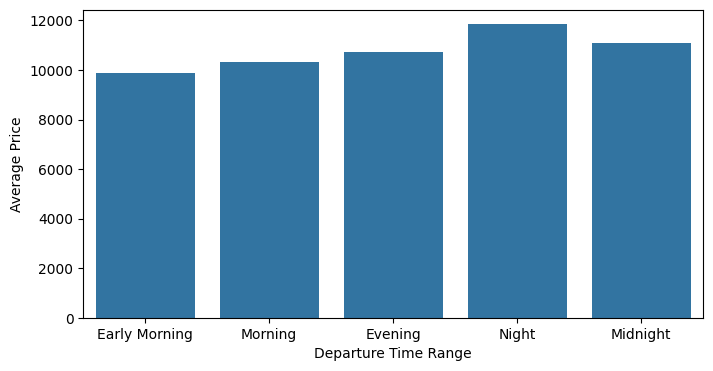

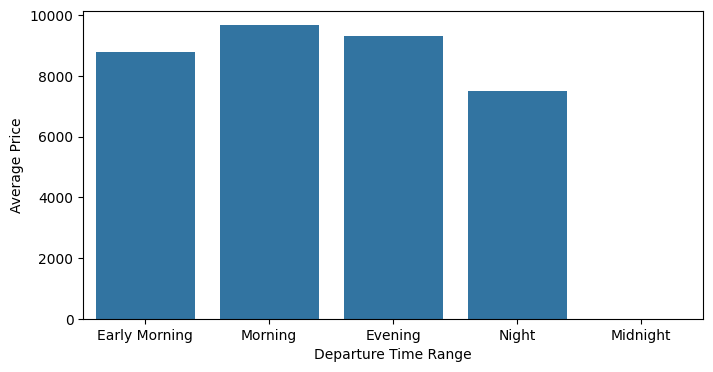

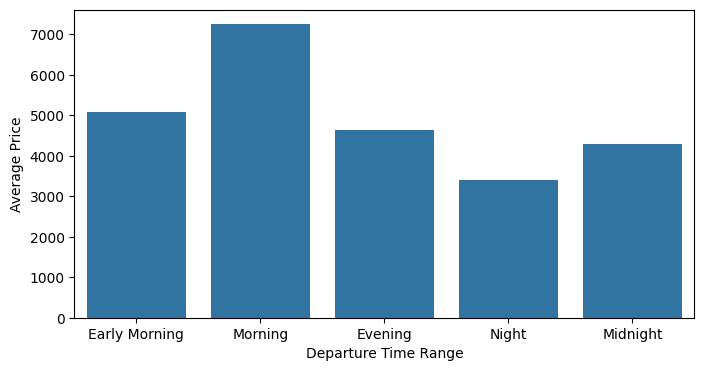

In [123]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_Banglore_Delhi, x="Dep_time", y="Price", errorbar=None, order= Departure_time_order)
plt.xlabel('Departure Time Range ')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_Chennai_Kolkata, x="Dep_time", y="Price", errorbar=None, order= Departure_time_order)
plt.xlabel('Departure Time Range')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_Delhi_Cochin, x="Dep_time", y="Price", errorbar=None, order= Departure_time_order)
plt.xlabel('Departure Time Range')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_Kolkata_Banglore, x="Dep_time", y="Price", errorbar=None, order= Departure_time_order)
plt.xlabel('Departure Time Range')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=df_Mumbai_Hyderabad, x="Dep_time", y="Price", errorbar=None, order= Departure_time_order)
plt.xlabel('Departure Time Range')
plt.ylabel('Average Price')
plt.show()

In [142]:
# Create a sample DataFrame for illustration (replace this with your actual DataFrame)
data = {'Source','Destination','Total_Stops','Total_Duration','Price'}
df_ave = pd.DataFrame(data)

df['Route'] = df['Source'] + ' to ' + df['Destination']
# Group by 'Source' and 'Destination' and calculate mean of 'Duration' and 'Price'
df_ave = df.groupby(['Route','Total_Stops']).agg({'Total_Duration': 'mean', 'Price': 'mean'}).reset_index()

# Rename columns for clarity
df_ave.rename(columns={'Total_Duration': 'Average_Duration', 'Price': 'Average_Price'}, inplace=True)

df_ave


,Route,Total_Stops,Average_Duration,Average_Price
0,Banglore to Delhi,0,2.853331,5561.114691
1,Banglore to Delhi,1,13.318274,14016.540925
2,Banglore to Delhi,2,22.309467,13322.800000
3,Banglore to Delhi,3,23.334286,12761.000000
4,Banglore to Delhi,4,29.500000,17686.000000
5,Chennai to Kolkata,0,2.325722,4789.892388
6,Delhi to Cochin,0,3.131268,6315.816901
7,Delhi to Cochin,1,11.772527,10030.021971
8,Delhi to Cochin,2,20.656065,12752.039533
9,Delhi to Cochin,3,27.541600,12939.840000


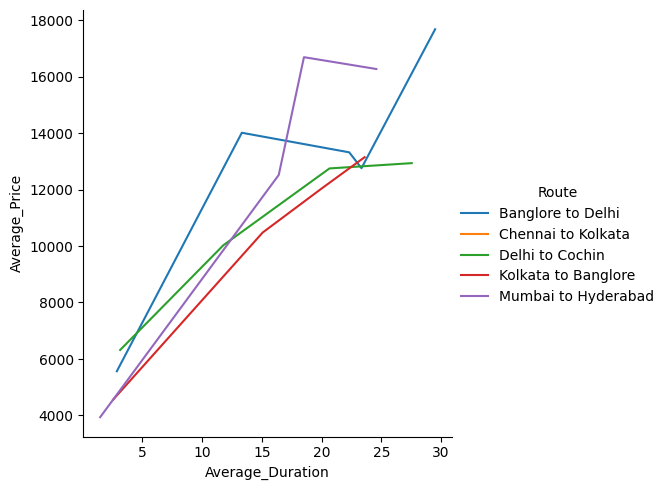

In [153]:
sns.relplot(data=df_ave, x="Average_Duration", y="Average_Price", hue="Route", kind="line")